### Data Processing

In [29]:
import pandas as pd

# read train data
meta_train_data = pd.read_csv('Data/train/train_metadata.csv')
color_histogram_train = pd.read_csv('Data/train/Features/color_histogram.csv')
hog_pca_train = pd.read_csv('Data/train/Features/hog_pca.csv')
additional_features_train = pd.read_csv('Data/train/Features/additional_features.csv')

### ML models

In [30]:
# dfs = [color_histogram_train, hog_pca_train, additional_features_train] 

# using only hog_pca features
dfs = [hog_pca_train]

dfs = [df.drop(columns='image_path') for df in dfs]
# Concatenate them along columns
data_train = pd.concat(dfs, axis=1)

# Set the index to meta_train_data["id"]
data_train.index = meta_train_data["id"]

print(data_train.head())

# using only hog_pca features


      hog_pca_0  hog_pca_1  hog_pca_2  hog_pca_3  hog_pca_4  hog_pca_5  \
id                                                                       
7218  -0.763458   0.927880   0.264329  -0.638673   0.831455  -0.527469   
6333   1.049284   3.608200  -1.817190   0.904380  -0.282195   0.623239   
6867  -1.552440  -0.432374  -0.318422   0.671877  -0.381869  -0.224374   
7730  -1.556871   0.214406   0.973758   0.613876  -0.657341   0.007032   
6338  -0.944294  -0.334833   0.415215  -0.607014  -1.004900   0.172754   

      hog_pca_6  hog_pca_7  hog_pca_8  hog_pca_9  hog_pca_10  hog_pca_11  \
id                                                                         
7218  -0.959387  -0.538355   1.262615  -0.245512   -0.439643   -1.485862   
6333  -0.510430  -0.388628  -0.457727  -0.033302   -0.190342    0.210740   
6867   0.565182   0.267907   0.144193  -0.150904    0.521769    0.328718   
7730   0.140899  -0.159095  -0.187679  -0.142929    0.948256   -0.115478   
6338  -0.692467  -0.19340

In [31]:
label_train = meta_train_data["ClassId"]
label_train.index = meta_train_data["id"]

In [32]:
# decision tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


zero_r = DummyClassifier(strategy="most_frequent")
decision_tree = DecisionTreeClassifier(max_depth=10)


X_train, X_test, y_train, y_test = train_test_split(data_train, label_train, test_size=0.20)
X = meta_train_data
y = label_train

In [33]:
print('X_train: {} X_test: {} y_train: {} y_test: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (4390, 20) X_test: (1098, 20) y_train: (4390,) y_test: (1098,)


In [34]:
from sklearn.metrics import accuracy_score

zero_r.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

zr_acc = accuracy_score(zero_r.predict(X_train),y_train)
dt_acc = accuracy_score(decision_tree.predict(X_train),y_train)

print('Train accuracies: \n 0-R: {} \n DT: {}'.format(zr_acc, dt_acc))

zr_acc = accuracy_score(zero_r.predict(X_test),y_test)
dt_acc = accuracy_score(decision_tree.predict(X_test),y_test)

print('Test accuracies: \n 0-R: {} \n DT: {}'.format(zr_acc, dt_acc))

Train accuracies: 
 0-R: 0.05899772209567198 
 DT: 0.5403189066059225
Test accuracies: 
 0-R: 0.051001821493624776 
 DT: 0.47540983606557374


In [35]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Train the regressor
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
train_preds = regressor.predict(X_train)
test_preds = regressor.predict(X_test)

# Evaluation using R^2 and MSE
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train R^2: {train_r2:.4f}, MSE: {train_mse:.4f}')
print(f'Test R^2: {test_r2:.4f}, MSE: {test_mse:.4f}')


Train R^2: 0.9201, MSE: 11.4263
Test R^2: 0.6834, MSE: 47.3640


In [49]:
# try KNN and SVM

import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [50]:
print(accuracy_score(knn.predict(X_test),y_test))

0.76775956284153


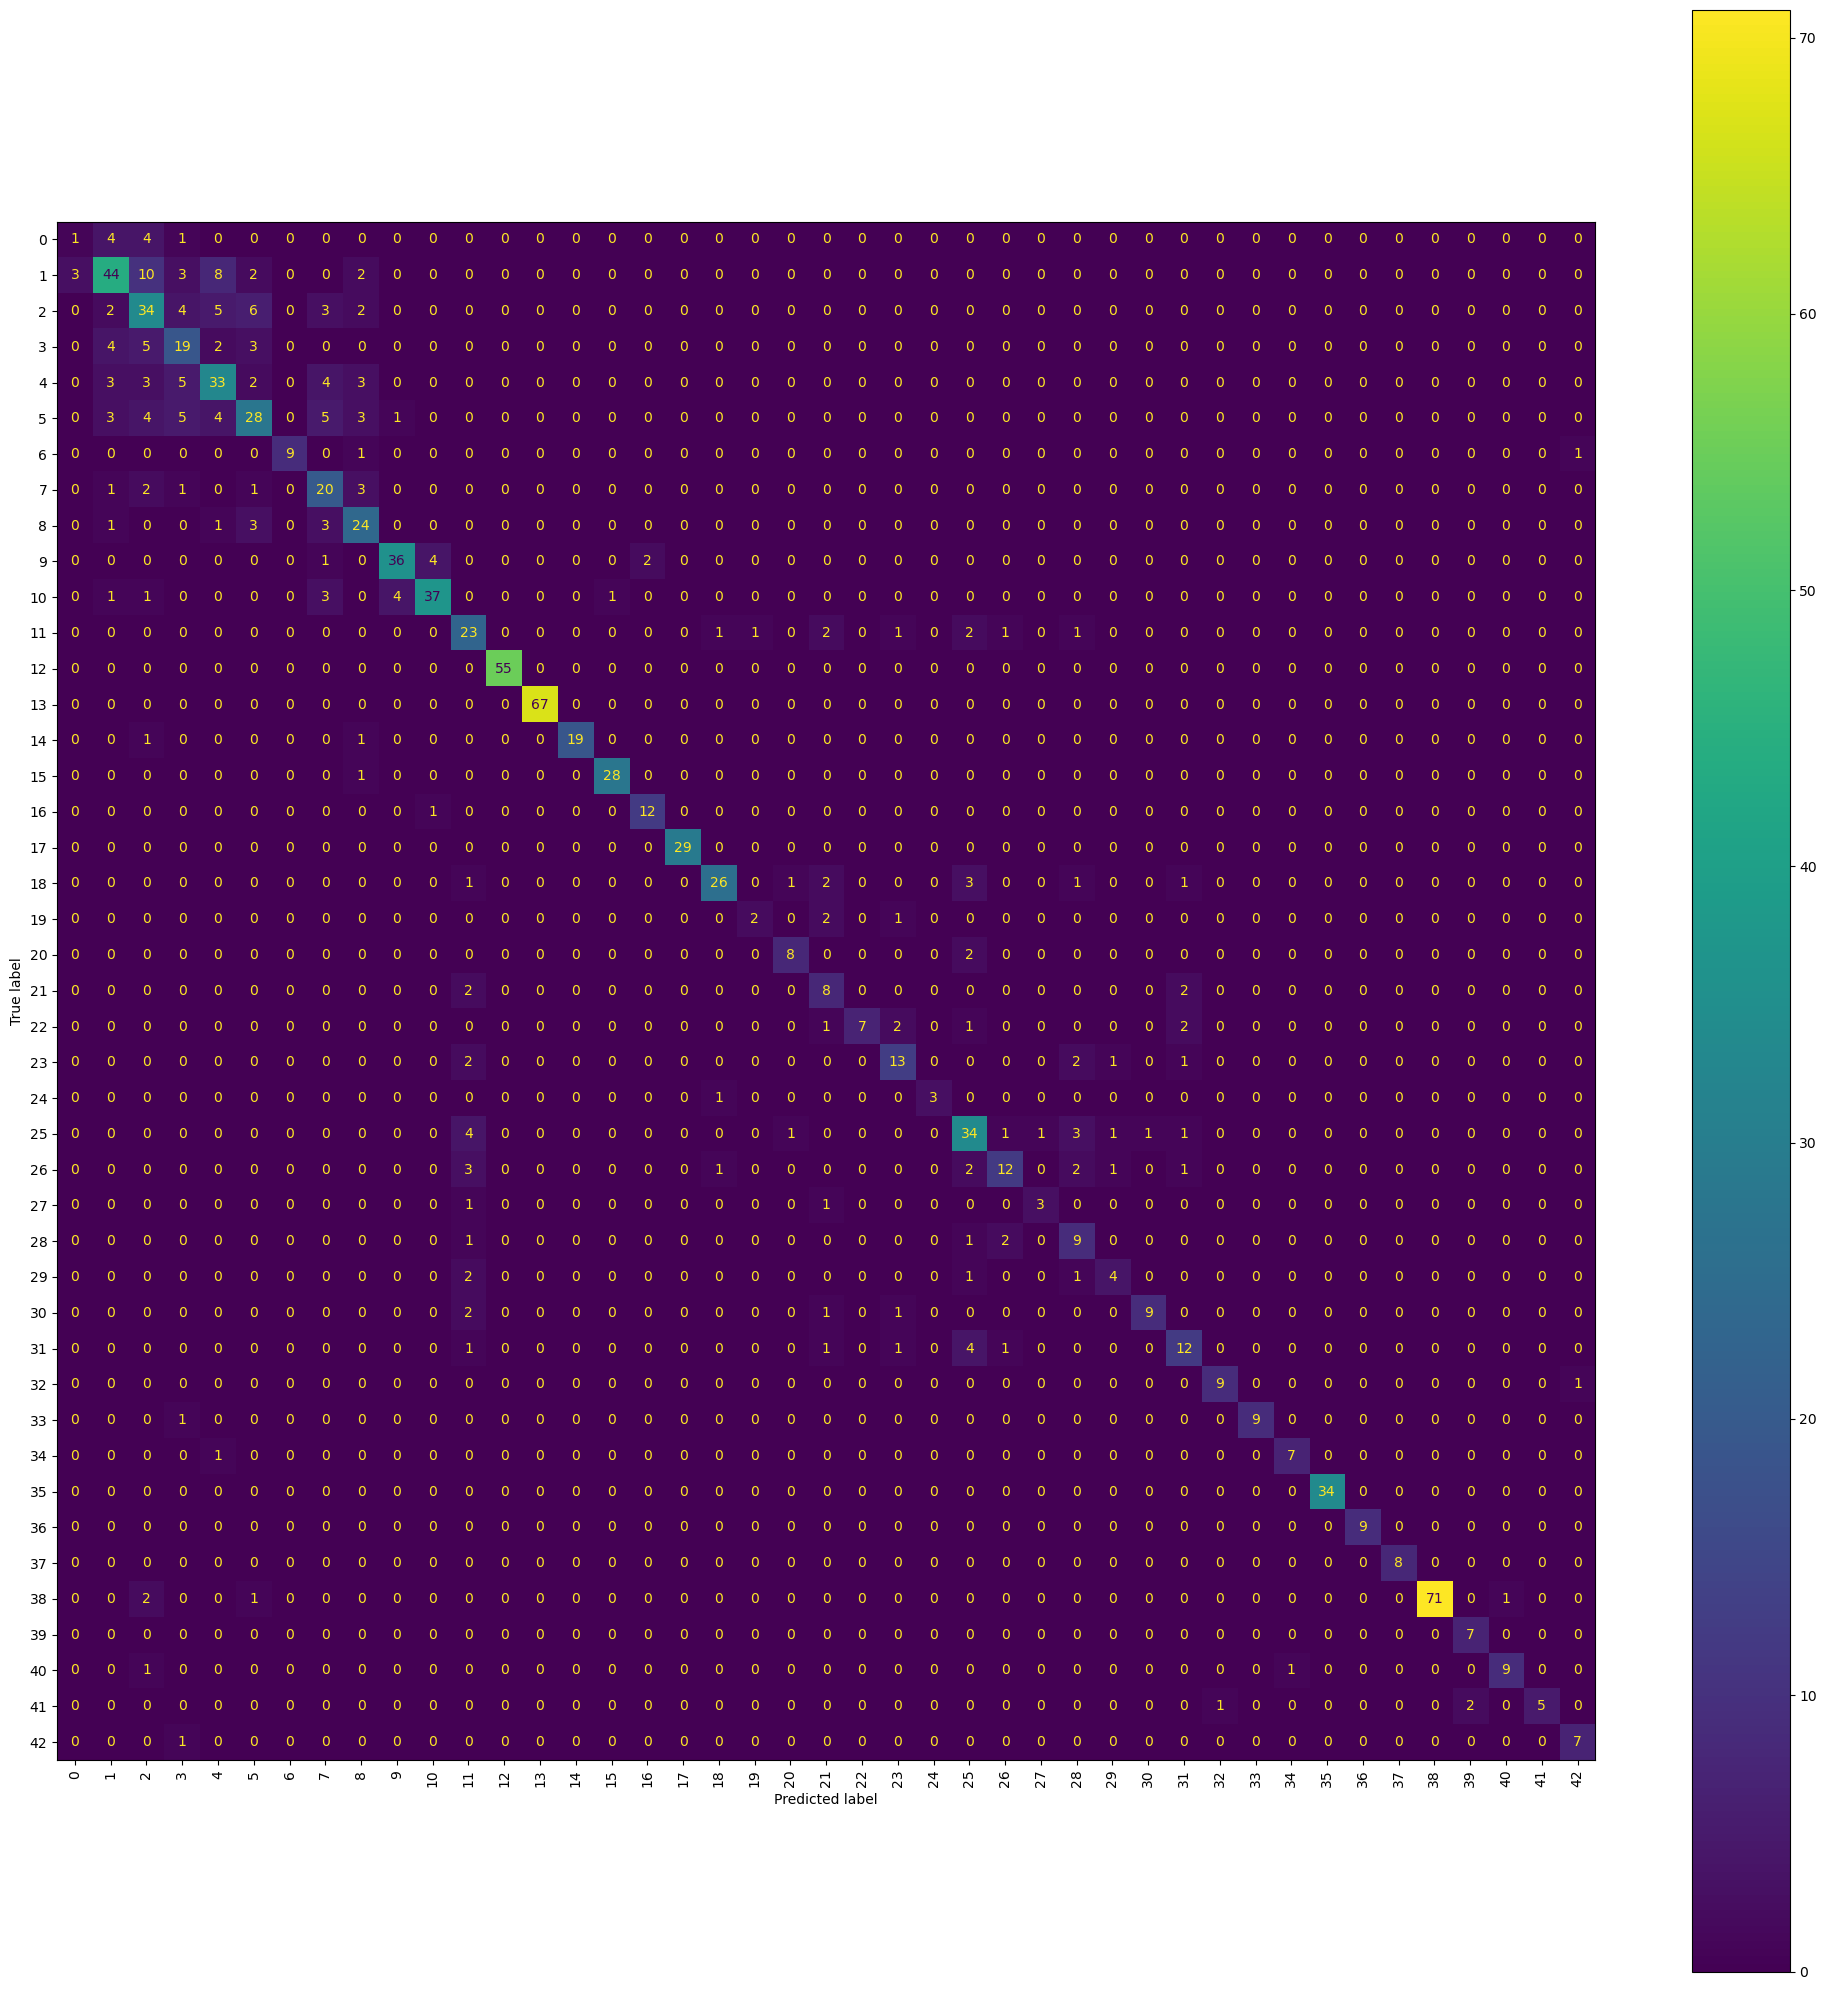

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)

# Increase figure size to make it more readable
fig, ax = plt.subplots(figsize=(20, 20))  # Adjust the size as needed
disp.plot(ax=ax, xticks_rotation='vertical')  # rotate x-tick labels for clarity
plt.tight_layout()
plt.show()

In [52]:
# test data
meta_test_data = pd.read_csv('Data/test/test_metadata.csv', sep=',')
color_histogram_test = pd.read_csv('Data/test/Features/color_histogram.csv', sep=',')
hog_pca_test = pd.read_csv('Data/test/Features/hog_pca.csv', sep=',')
additional_features_test = pd.read_csv('Data/test/Features/additional_features.csv', sep=',')

In [53]:
dfs = [hog_pca_test]


dfs = [df.drop(columns='image_path') for df in dfs]
# Concatenate them along columns
data_test = pd.concat(dfs, axis=1)

# Set the index to meta_train_data["id"]
data_test.index = meta_test_data["id"]

print(data_test.head())

      hog_pca_0  hog_pca_1  hog_pca_2  hog_pca_3  hog_pca_4  hog_pca_5  \
id                                                                       
661    0.597466   1.520531   0.411531  -1.971381  -0.594053  -1.018461   
4477  -2.208741  -0.824214  -0.535469  -0.781442   0.948866  -0.413522   
1046  -0.001004   0.975770  -0.058772   0.505151   0.527402   0.021935   
631   -0.811440   0.536341   1.365921   0.743867   0.279398   0.049751   
6533  -2.171802  -0.642769   0.826297   0.492189  -0.146542  -0.697473   

      hog_pca_6  hog_pca_7  hog_pca_8  hog_pca_9  hog_pca_10  hog_pca_11  \
id                                                                         
661   -1.765009  -0.280112   0.740621  -0.229441    0.020494    0.099204   
4477   0.483797  -0.320895   0.371367  -0.172562   -0.239770   -0.614171   
1046  -0.114622  -0.791304  -0.401304  -0.413770   -0.356764    0.628376   
631    0.140865   0.197511   0.489614   0.617741    0.188121    0.167537   
6533  -0.077197   0.23559

In [54]:
# use knn to predict
predictions = knn.predict(data_test)
print(predictions)

[12  3  2 ... 31 14 15]


In [55]:
# Create DataFrame with index as 'id' and prediction as 'ClassId'
result_df = pd.DataFrame({
    'id': data_test.index,        # Assumes data_test has the correct index
    'ClassId': predictions
})

# Write to CSV
result_df.to_csv("result.csv", index=False)

In [56]:
# logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
lgr = LogisticRegression()
#train the model using the training set
lgr.fit(X_train,y_train)
#test the model using the testiong set
print("Accuracy:",lgr.score(X_test,y_test))

Accuracy: 0.7714025500910747


In [57]:
predictions = lgr.predict(data_test)

# Create DataFrame with index as 'id' and prediction as 'ClassId'
result_df = pd.DataFrame({
    'id': data_test.index,        # Assumes data_test has the correct index
    'ClassId': predictions
})

# Write to CSV
result_df.to_csv("result.csv", index=False)